## Kaggle database Supermarket sales


Context

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

more information:https://www.kaggle.com/aungpyaeap/supermarket-sales

### Importar bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importar dados

In [2]:
df = pd.read_csv("./data/supermarket_sales - Sheet1.csv")

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### criando a coluna "Mês" (Month)

In [3]:
df['Month'] = df['Date'].str[0:1]
df['Month'] = df['Month'].astype('int32')

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


### Questão 1: Qual o mês com melhores vendas nas três filias? o quanto foi ganho neste mês em cada filial?

Unit price  Quantity     Tax 5%       Total      cogs  \
Month Branch                                                          
1     A          6349.53       685  1841.9585  38681.1285  36839.17   
      B          6544.41       600  1770.2885  37176.0585  35405.77   
      C          6859.95       680  1925.4610  40434.6810  38509.22   
2     A          5430.93       493  1421.9105  29860.1205  28438.21   
      B          5919.62       624  1639.2510  34424.2710  32785.02   
      C          5808.97       537  1568.3325  32934.9825  31366.65   
3     A          6845.03       681  1793.2915  37659.1215  35865.83   
      B          6014.85       596  1647.4925  34597.3425  32949.85   
      C          5898.84       614  1771.3830  37199.0430  35427.66   

              gross margin percentage  gross income  Rating  
Month Branch                                                 
1     A                    566.666667     1841.9585   842.3  
      B                    528.571429     1770.2885   755.0  
      C                    580.952381     1925.4610   872.9  
2     A                    447.619048     1421.9105   658.7  
      B                    519.047619     1639.2510   763.9  
      C                    476.190476     1568.3325   720.0  
3     A                    604.761905     1793.2915   888.2  
      B                    533.333333     1647.4925   744.7  
      C                    504.761905     1771.3830   727.0

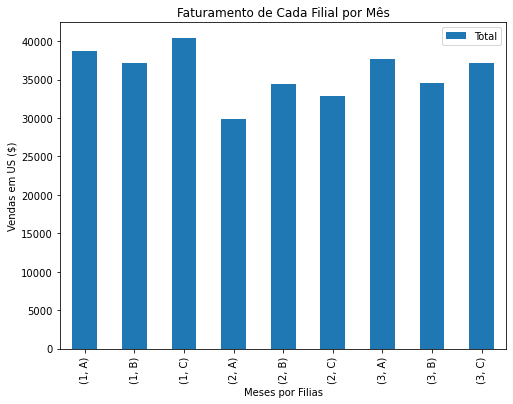

In [4]:
results = df.groupby(['Month','Branch']).sum()

display(results)

results.plot.bar(y='Total', ylabel='Vendas em US ($)', xlabel = 'Meses por Filias', title = 'Faturamento de Cada Filial por Mês', figsize=(8,6));

### Questão 2: Qual cidade teve o maior valor em vendas?

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
City,,,,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,665
Naypyitaw,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,640
Yangon,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,688


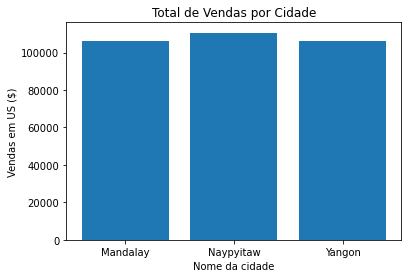

In [5]:
results = df.groupby(['City']).sum()

cidades = [city for city, df in df.groupby('City')]

display(results)

plt.bar(cidades, results['Total'])
plt.xticks(cidades)
plt.ylabel('Vendas em US ($)')
plt.xlabel('Nome da cidade')
plt.title('Total de Vendas por Cidade')

plt.show()

### Questão 3: Quantos produtos foram vendidos em cada cidade?

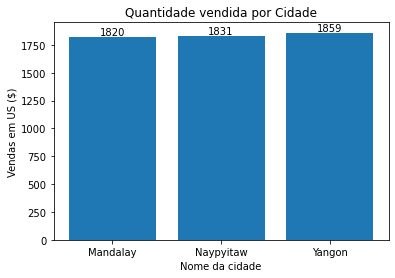

In [6]:
y = results['Quantity']

plt.bar(cidades, y)
plt.xticks(cidades)
plt.ylabel('Vendas em US ($)')
plt.xlabel('Nome da cidade')
plt.title('Quantidade vendida por Cidade')

for i in range(len(cidades)):
    plt.text(i,y[i],y[i], ha ='center',va='bottom')

plt.show()

### Questão 4: Qual o tipo de produto mais vendido?

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Product line,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,348
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,346
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,348
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,312
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,324
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,315


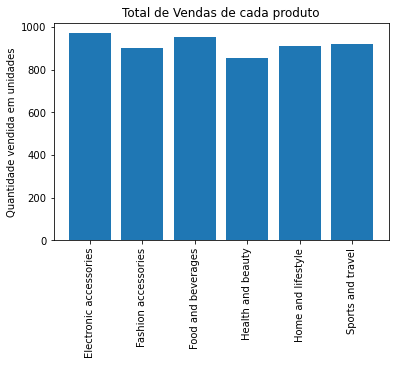

In [7]:
results = df.groupby(['Product line']).sum()

product_line = [product for product, df in df.groupby('Product line')]

display(results)

plt.bar(product_line, results['Quantity'])
plt.xticks(product_line, rotation='vertical')
plt.ylabel('Quantidade vendida em unidades')
plt.title('Total de Vendas de cada produto')

plt.show()

### Questão 5: Em que horario devemos aumentar o numero de anúncios para maximar a probabilidade da venda do produto?

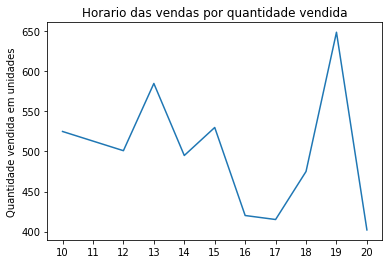

In [28]:
#pegando somente a hora da variável 'Time'
df['Hour'] = df['Time'].str[0:2]


results = df.groupby('Hour').sum()

hora = [hora for hora, df in df.groupby('Hour')]

plt.plot(hora, results['Quantity'])
plt.ylabel('Quantidade vendida em unidades')
plt.title('Horario das vendas por quantidade vendida')

plt.show()

### Questão 6: Qual a filial mais bem rankeada pelo público?

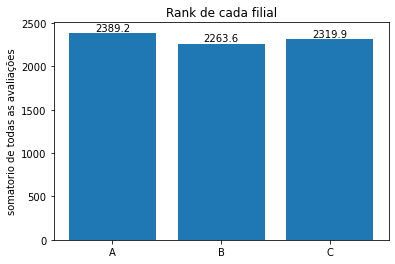

In [27]:
results = df.groupby('Branch').sum()

filial = [branch for branch, df in df.groupby('Branch')]

y = round(results['Rating'],2)

plt.bar(filial, y)
plt.ylabel('somatorio de todas as avaliações')
plt.title('Rank de cada filial')

for i in range(len(filial)):
    plt.text(i,y[i],y[i], ha ='center',va='bottom')
    
plt.show()